<a href="https://colab.research.google.com/github/VivekDubey18/Digit-Recognition-using-Tensorflow/blob/main/Digit_Recognition_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow/Keras version
import tensorflow as tf                                                           # Imports the TensorFlow library.
from tensorflow.keras.datasets import mnist                                       # Imports the mnist dataset loader
from tensorflow.keras.models import Sequential                                    # To import the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Imports different layer types you will use in your CNN:
from tensorflow.keras.utils import to_categorical                                 # Imports the utility function to_categorical.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping             #for callbacks
import matplotlib.pyplot as plt                                                   #for accuracy graph

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



# Normalize input images i.e range is converted [0-255] --> [0-1] to improve performance and stability
x_train = x_train / 255.0
x_test = x_test / 255.0


#Converts the integer labels e.g. 3-> into  --> one-hot vectors  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) to work efficiently with categorical_crossentropy
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),   # Conv Layer 1  (1st layer after input layer)
    MaxPooling2D(pool_size=(2, 2)),                                   # Max Pooling
    Conv2D(64, (3, 3), activation='relu'),                            # Conv Layer 2
    MaxPooling2D(pool_size=(2, 2)),                                   # Max Pooling
    Flatten(),                                                        # Flatten to 1D
    Dense(128, activation='relu'),                                    # Fully connected layer  (total dense layer = 1 that contain 128 neurons)
    Dropout(0.5),                                                     # Dropout for regularization
    Dense(10, activation='softmax')                                   # Output Layer (10 nerons for 10 classes 0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',       # to calculate loss function
              metrics=['accuracy'])                  # to calculate accuracy



#Define callbacks
#it saves the best performing model ignoring the model where accuracy decreases
checkpoint = ModelCheckpoint(
    'best_model.keras', monitor='val_accuracy', save_best_only=True,
    mode='max', verbose=1                                             #max accuracy is best,verbose print the msg of saving
)


#to handle overfitting it monitor validation_accuracy ....ans if validation accuracy continues for 3 epochs it will terminate and saves the model where the best weights are present
early_stop = EarlyStopping(
    monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1
)

#Train the model with callbacks
history = model.fit(
    x_train, y_train,                         # Input training data
    epochs=8,                                 # 8 times full passes to be made over the training data.
    batch_size=32,                            # number of samples processed before updating the model’s weights.
    validation_split=0.1,                     #Reserves 10% of the training data for validation
    callbacks=[checkpoint, early_stop]        #for early stopping and saving best model
)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8602 - loss: 0.4446
Epoch 1: val_accuracy improved from -inf to 0.98367, saving model to best_model.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8602 - loss: 0.4444 - val_accuracy: 0.9837 - val_loss: 0.0533
Epoch 2/8
1683/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9748 - loss: 0.0855
Epoch 2: val_accuracy improved from 0.98367 to 0.99033, saving model to best_model.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9748 - loss: 0.0855 - val_accuracy: 0.9903 - val_loss: 0.0403
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0570
Epoch 3: val_accuracy did not improve from 0.99033
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9832 - loss: 0.0570 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 4/8
1680/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0444
Epoch 4: val_accuracy improved from 0.99033 to 0.99117, saving mode

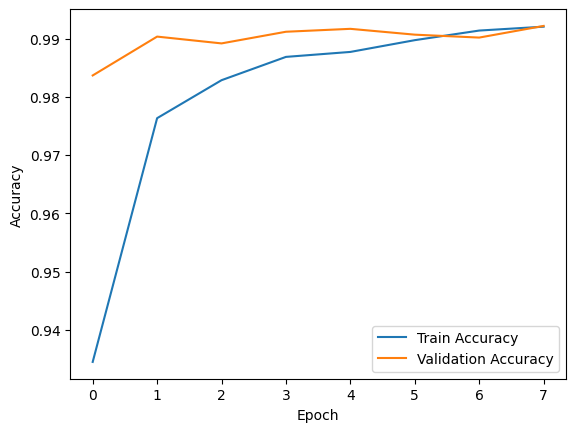

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0352
Test accuracy : 0.9910


In [4]:
#Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')             # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')    # plot validation accuracy
plt.xlabel('Epoch')                                                       # x axis-->  Epoch
plt.ylabel('Accuracy')                                                    # y axis--> Accuracy
plt.legend()                                                              #display the box to distinguish between the Train Accuracy and Validation Accuracy lines.
plt.show()


# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy : {test_acc:.4f}")